In [ ]:
# Description: This program predicts the price of GOOG stock for a   
               specific day 
#              using the Machine Learning algorithm called Support 
               Vector Regression (SVR) 
#          

In [1]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
#Load the data
#from google.colab import files # Use to load data on Google Colab
#uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('GOOG.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,2395.169922,1689400
1,2021-05-04,2369.739990,2379.260010,2311.699951,2354.250000,2354.250000,1756000
2,2021-05-05,2368.419922,2382.199951,2351.409912,2356.739990,2356.739990,1090300
3,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900
4,2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,2398.689941,1163600
5,2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
6,2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
7,2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
8,2021-05-13,2261.090088,2276.601074,2242.719971,2261.969971,2261.969971,1333500
9,2021-05-14,2291.830078,2321.139893,2283.320068,2316.159912,2316.159912,1331200


In [3]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
19,2021-05-28,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400


In [4]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,2402.719971,2419.699951,2384.500000,2395.169922,2395.169922,1689400
1,2021-05-04,2369.739990,2379.260010,2311.699951,2354.250000,2354.250000,1756000
2,2021-05-05,2368.419922,2382.199951,2351.409912,2356.739990,2356.739990,1090300
3,2021-05-06,2350.639893,2382.709961,2342.337891,2381.350098,2381.350098,1030900
4,2021-05-07,2400.000000,2416.409912,2390.000000,2398.689941,2398.689941,1163600
5,2021-05-10,2374.889893,2378.000000,2334.729980,2341.659912,2341.659912,1300300
6,2021-05-11,2291.860107,2322.000000,2283.000000,2308.760010,2308.760010,1605500
7,2021-05-12,2261.709961,2285.370117,2230.050049,2239.080078,2239.080078,1746700
8,2021-05-13,2261.090088,2276.601074,2242.719971,2261.969971,2261.969971,1333500
9,2021-05-14,2291.830078,2321.139893,2283.320068,2316.159912,2316.159912,1331200


In [5]:
#Create the lists / X and y data set
days = list()
adj_close_prices = list()

In [6]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [7]:
#Create the independent data set
for day in df_days:
   days.append( [int(day.split('-')[2])] )
#Create the dependent data set
for adj_close_price in df_adj_close:
   adj_close_prices.append( float(adj_close_price) )

In [8]:
print(days)

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]


In [9]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=2500.0, gamma=0.20)
rbf_svr.fit(days, adj_close_prices)

SVR(C=2500.0, gamma=0.2)

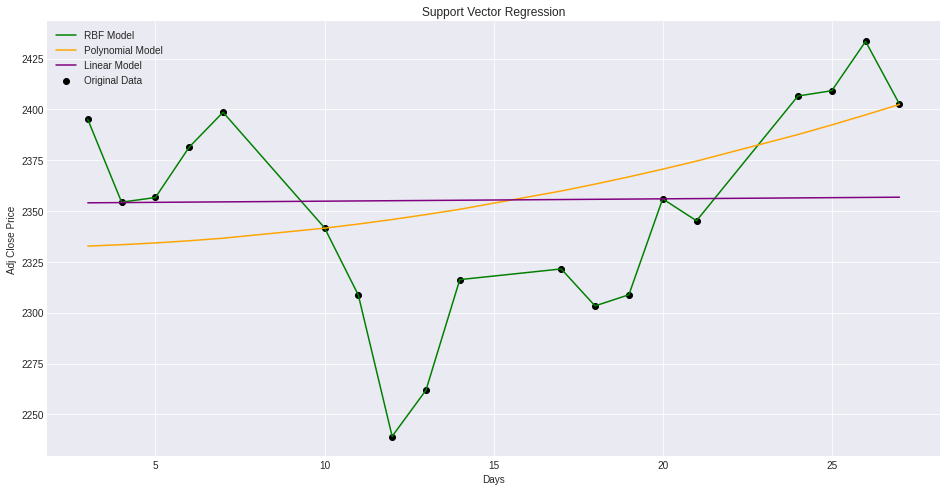

In [10]:
#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'purple', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [11]:
day = [[30]]
print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [2314.71490255]
The Linear SVR predicted: [2357.140143]
The Polynomial SVR predicted: [2418.95629238]
